<a href="https://colab.research.google.com/github/HananehKoushki/NLP-Assignment/blob/master/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
# Import library
import re
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as ps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score####

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


download dataset from:


https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset

In [180]:
# Load the dataset
df = pd.read_csv('combined_data.csv', encoding='ISO-8859-1')
# Rename column
df.columns = ['labels', 'emails']
df

,labels,emails
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


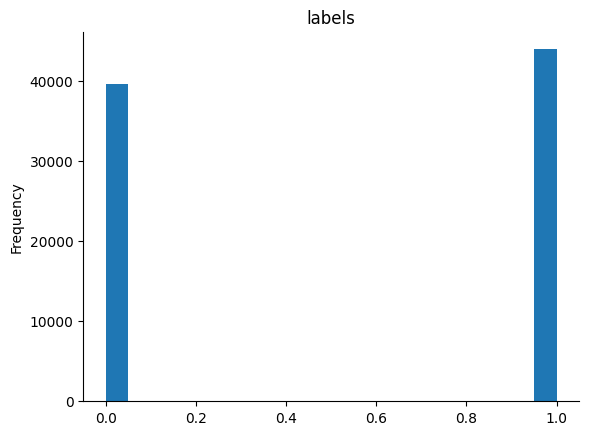

In [181]:
df['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

In this dataset:

'1' indicates that the email is classified as spam.

'0' denotes that the email is legitimate (ham).

In [182]:
# Create a copy of the DataFrame to avoid modifying the original
df_clean = df.copy()

# Function to clean text
def clean_text(emails):
    emails = re.sub('[^a-zA-Z]', ' ', emails)  # Remove non-alphabetic characters
    emails = emails.lower()  # Convert to lowercase
    emails = emails.split()  # Split into words
    emails = [ps.stem(word) for word in emails if word not in stopwords('english')]  # Remove stop words and stem
    return ' '.join(emails)

# Clean text in the 'emails' column
if not df_clean['emails'].dtype == object:  # Check if 'emails' is already a string
    df_clean['emails'] = df_clean['emails'].apply(clean_text)

In [183]:
# Separate features (X) and target (y)
X = df_clean['emails']
Y = df_clean['labels']  # Assuming 'label' is the target column

In [184]:
# Split the data into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=0)

In [185]:
# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(Xtrain)
Xtest = vectorizer.transform(Xtest)

In [186]:
from sklearn.naive_bayes import MultinomialNB
# Create and train Model, print scores
model = MultinomialNB().fit(Xtrain, Ytrain)
print("Train Accuracy:", model.score(Xtrain, Ytrain))
print("Test Accuracy:", model.score(Xtest, Ytest))

Train Accuracy: 0.9829905204793418
Test Accuracy: 0.9732369816253904


In [187]:
Ptrain = model.predict (Xtrain)
Ptest = model.predict (Xtest)

# Output of (model.score(Xtrain, Ytrain)) == (accuracy_score(Ytrain, Ptrain))
# Output of (model.score(Xtest, Ytest)) == (accuracy_score(Ytest, Ptest))

print ("Train F1_score:", f1_score(Ytrain, Ptrain))
print ("Test F1_score:", f1_score(Ytest, Ptest))

Train F1_score: 0.9837998058020885
Test F1_score: 0.974211833864026


In [188]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("Train ROC AUC:", roc_auc_score(Ytrain, Prob_train))
print("Test ROC AUC:", roc_auc_score(Ytest, Prob_test))

Train ROC AUC: 0.9968182189073898
Test ROC AUC: 0.9931714687463364


In [189]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[26083,   342],
       [  609, 28876]])

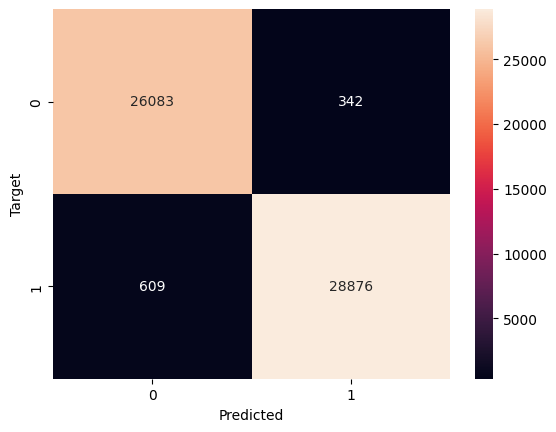

In [190]:
def plot_cm(cm):
  classes = ['0', '1']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm,annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")
plot_cm(cm)

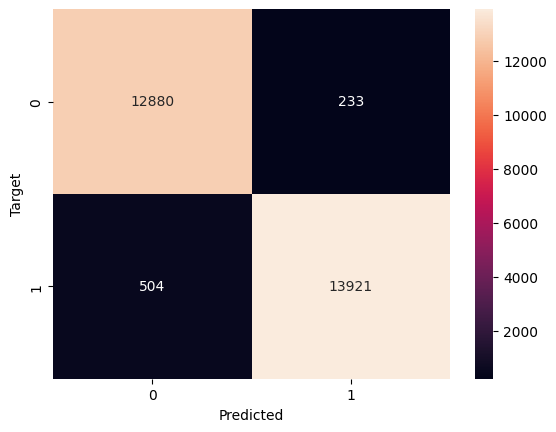

In [191]:
cm_test = cm = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)